![head.png](https://github.com/cafawo/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Linear Regression and Optimization

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

In this assignment you will work with data that is stored in a file named **02_python_data.csv**, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

In this exercise we will compare the **DAX index** (.GDAXI) to a portfolio build from the **constituents** (the remaining columns).

### Task:

Find the vector of weights $\mathbf{w}$ for the [Minimum Variance Portfolio (MVP)](https://en.wikipedia.org/wiki/Modern_portfolio_theory) using only the constituents (not .GDAXI). Print risk ($\sigma$) and return ($\mu$) of both, DAX and MVP. Show in a single graph the cumulative log-returns of both portfolios. Please note that the sum of $\mathbf{w}$ must be $100$%. ALso, you are not allowed to use short positions, i.e. $w \ge 0\ \forall\ w \in \mathbf{w}$.

Hint: The portfolio variance - which we want to minimize - is given by
$$
\sigma^2_\text{Portfolio} = \mathbf{w}^\intercal \mathbf{\Sigma} \mathbf{w},
$$
where $\mathbf{\Sigma}$ is the correlation matrix of the portfolio constituents.

The optimal weights for the MVP:[0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103]
DAX Return (µ): 0.12064034076902336
DAX Risk (σ): 0.19200730935077592
MVP Return (µ): 0.06508000546000185
MVP Risk (σ): 0.012867995467185927


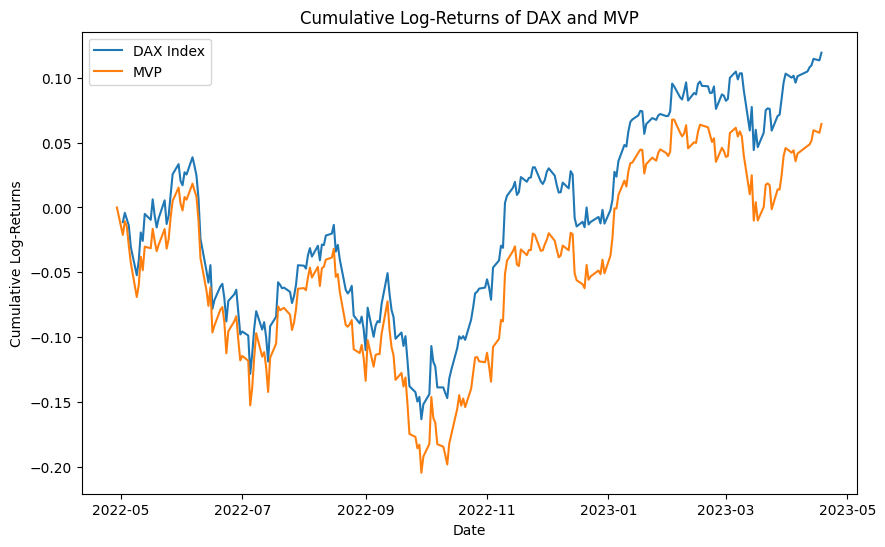

In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('02_python_data.csv', index_col='Date', parse_dates=True)

# Calculate the daily log-returns
df_log_returns = np.log(df / df.shift(1))

# Extract the log-returns of the constituents
constituents_log_returns = df_log_returns.drop('.GDAXI', axis=1)

# Calculate the covariance matrix of the constituents
cov_matrix = constituents_log_returns.cov()

# Define the optimization problem
def portfolio_variance(weights, covariance_matrix):
    return weights.T @ covariance_matrix @ weights

# Constraints for the weights (no short positions and sum to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
               {'type': 'ineq', 'fun': lambda x: x})

# Initial guess for the weights
num_assets = len(constituents_log_returns.columns)
initial_guess = np.ones(num_assets) / num_assets

# Optimization
result = sco.minimize(portfolio_variance, initial_guess,
                      args=(cov_matrix,), method='SLSQP',
                      constraints=constraints)

# The optimal weights for the MVP
weights_mvp = result.x

# Calculate the MVP risk (σ) and return (µ)
mvp_risk = np.sqrt(portfolio_variance(weights_mvp, cov_matrix))
mvp_return = np.sum(weights_mvp * constituents_log_returns.mean()) * 252

# Calculate the cumulative log-returns for the DAX and MVP
df_cumulative_log_returns = df_log_returns.cumsum()
mvp_cumulative_log_returns = (constituents_log_returns * weights_mvp).sum(axis=1).cumsum()

# Calculate the DAX risk (σ) and return (µ)
dax_log_returns = df_log_returns['.GDAXI']
dax_return = dax_log_returns.mean() * 252  # Annualized return
dax_risk = dax_log_returns.std() * np.sqrt(252)  # Annualized risk

print(f"The optimal weights for the MVP:{weights_mvp}")

# Print the DAX and MVP risk and return
print(f"DAX Return (µ): {dax_return}")
print(f"DAX Risk (σ): {dax_risk}")
print(f"MVP Return (µ): {mvp_return}")
print(f"MVP Risk (σ): {mvp_risk}")

# Plot the cumulative log-returns
plt.figure(figsize=(10, 6))
plt.plot(df_cumulative_log_returns['.GDAXI'], label='DAX Index')
plt.plot(mvp_cumulative_log_returns, label='MVP')
plt.title('Cumulative Log-Returns of DAX and MVP')
plt.xlabel('Date')
plt.ylabel('Cumulative Log-Returns')
plt.legend()
plt.show()

### Task:

Use a linear regression model to find the actual weights of the index constituents that are required to replicate (i.e. explain) the returns of the DAX index. Print risk and return and show in a single graph the cumulative log-returns of both portfolios. Also show the [tracking error](https://en.wikipedia.org/wiki/Tracking_error) as the difference between the index and the replicating portfolio in the same figure.

### Task:

We want to create a ["smart-beta"](https://en.wikipedia.org/wiki/Smart_beta) strategy that replicates the DAX index returns using only a subset of its constituents. This is, maximize the fit of the model using only $3$ constituents. This process is similar to [feature selection](https://en.wikipedia.org/wiki/Feature_selection) in machine learning. Print risk and return and show in a single graph the cumulative log-returns of both portfolios. Also show the [tracking error](https://en.wikipedia.org/wiki/Tracking_error) as the difference between the index and the replicating portfolio in the same figure.